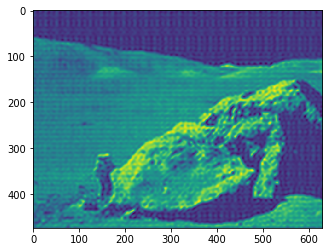

In [2]:
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt

img = plt.imread("http://members.cbio.mines-paristech.fr/~nvaroquaux/formations/scipy-lecture-notes/_images/moonlanding.png")
img_ft = fftpack.fft2(img, axes=(0, 1))
keep_fraction = 0.1
img_ft2 = img_ft.copy()
r, c = img_ft2.shape
img_ft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0
img_ft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0
img_new = fftpack.ifft2(img_ft2).real

plt.imshow(img_new)
plt.show()

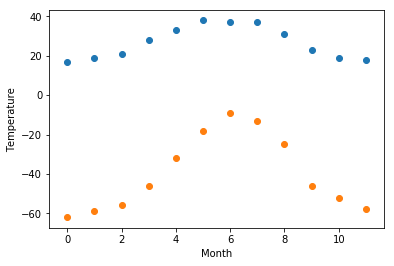

In [3]:
import numpy as np
import matplotlib.pyplot as plt
max_temperature = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
min_temperature = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
month_number = np.arange(0,12,1)
plt.scatter(month_number, max_temperature)
plt.scatter(month_number, min_temperature)
plt.xlabel('Month')
plt.ylabel('Temperature')

plt.show()

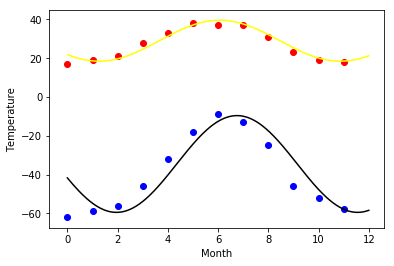

In [4]:
from scipy import optimize
def f(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2.5 * np.pi / times.max()))

a1_max, a2_max = optimize.curve_fit(f, month_number, max_temperature, [20, 10, 0])
a1_min, a2_min = optimize.curve_fit(f, month_number, min_temperature, [-40, 20, 0])

days = np.linspace(0, 12, num = 365)

plt.figure()
plt.scatter(month_number, max_temperature, color = 'red')
plt.plot(days, f(days, *a1_max), color = 'yellow')
plt.scatter(month_number, min_temperature, color = 'blue')
plt.plot(days, f(days, *a1_min), color = 'black')
plt.xlabel('Month')
plt.ylabel('Temperature')

plt.show()

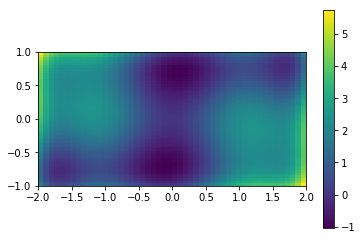

In [5]:
import numpy as np
def f(x,y):
    return ( (4 - 2.1*x*x + x**4/3.)*x*x + x*y + (4*y*y - 4)*y*y)
x = np.linspace(-2, 2)
y = np.linspace(-1, 1)
X, Y = np.meshgrid(x, y)
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(f(X, Y), extent=[-2, 2, -1, 1])
plt.colorbar()
plt.show()


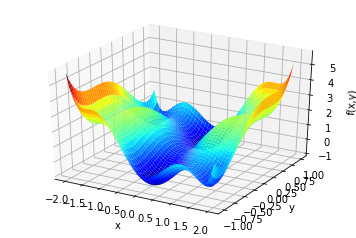

In [6]:
from mpl_toolkits.mplot3d import Axes3D
img = plt.figure()
axes = img.add_subplot(111, projection='3d')
s = axes.plot_surface(X, Y, f(X, Y), cmap=plt.cm.jet)

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_zlabel('f(x,y)')
plt.show()


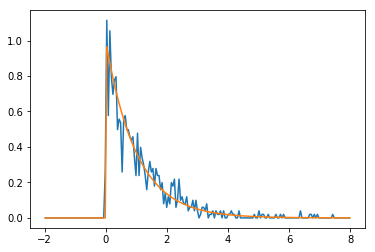

In [8]:
from scipy import stats

a = np.random.gamma(1,size = 1000)
bins = np.linspace(-2, 8, 200)
histogram = np.histogram(a, bins = bins, normed=True)[0]

newbin = 0.5*(bins[1:] + bins[:-1])
a1 = stats.gamma.pdf(newbin, 1)
plt.plot(newbin, histogram)
plt.plot(newbin, a1)
plt.show()

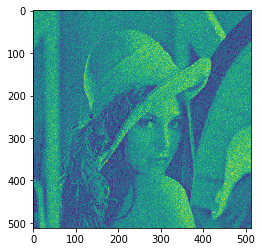

<Figure size 432x288 with 0 Axes>

In [9]:
from scipy import misc
from scipy import ndimage
lena = plt.imread('http://members.cbio.mines-paristech.fr/~nvaroquaux/formations/scipy-lecture-notes/_images/lena.png')

noisy_lena = np.copy(lena).astype(np.float)
noisy_lena += lena.std()*0.5*np.random.standard_normal(lena.shape)
blurred_lena = ndimage.gaussian_filter(noisy_lena, sigma=3)
median_lena = ndimage.median_filter(blurred_lena, size=5)
plt.imshow(noisy_lena)
plt.figure()
plt.show()

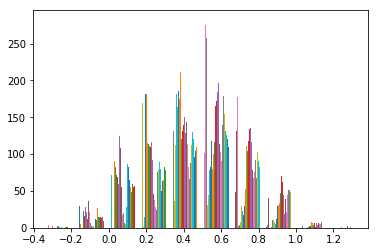

<Figure size 432x288 with 0 Axes>

In [10]:
plt.hist(noisy_lena)
plt.figure()
plt.show()

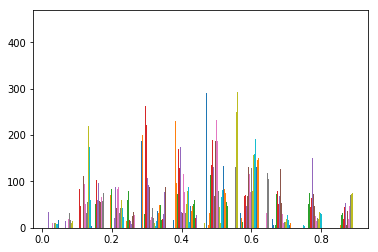

<Figure size 432x288 with 0 Axes>

In [11]:
plt.hist(blurred_lena)
plt.figure()
plt.show()

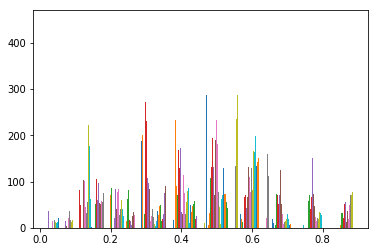

<Figure size 432x288 with 0 Axes>

In [12]:
plt.hist(median_lena)
plt.figure()
plt.show()


In [13]:
a = np.zeros((7, 7), dtype=np.int)
a[1:6, 2:5] = 1
b = ndimage.binary_erosion(a).astype(a.dtype)
ndimage.binary_dilation(b).astype(a.dtype)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [14]:
a = np.zeros((7, 7), dtype=np.int)
a[1:6, 2:5] = 1
ndimage.binary_opening(a).astype(np.int)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [15]:
a = np.zeros((50, 50))
a[10:-10, 10:-10] = 1
a += 0.25*np.random.standard_normal(a.shape)
mask = a>=0.5
opened_mask = ndimage.binary_opening(mask)
closed_mask = ndimage.binary_closing(opened_mask)
initialarea=30*30
initialarea-np.sum(closed_mask) < 30*30

True